# Step 0: Import libraries
---

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Plotting data
import matplotlib.pyplot as plt
import seaborn as sns

#Data manipulation
import numpy as np
import pandas as pd
from heatmap import heatmap, corrplot

# Step 1: Identifying Data

---

Produce a list of the financial data series you want to collect in each category. Do not worry if you cannot find the data. For now, just think about the types of data you want to collect. [COMPLETED ON GOOGLE DOC]




# Step 2: Go get the data

---

 The data selected here is for publicly traded equity, specifically the stock exchange. The public domain selected for this coursework is Yahoo Finance. A total of 7 stocks are selected to from a portfolio:

- Technology: Apple (AAPL), Amazon (AMZN)
- Finance: JP Morgan (JPM)
- Beverages: Coca-cola (KO)
- Consumer goods: Procter & Gamble (PG), Johnson &  Johnson(JNJ)
- Automotive: Tesla (TSLA)

A key assumption is that all stocks are equal-weighted in the portfolio. For an initial exploratory data analysis, the stock prices (USD) from 31/12/2018 until 31/12/2023 are imported below.


In [ ]:
# Variable definitions:
start_date = '2018-12-31'
end_date   = '2023-12-31'

portfolio_income_stocks  = ['AAPL', 'AMZN','JPM', 'KO', 'TSLA', 'PG', 'JNJ'] # EQUAL WEIGHTED

In [ ]:
# Fetching data
port_income_stocks_data = pdr.get_data_yahoo(portfolio_income_stocks, start = start_date, end = end_date)["Adj Close"]

[*********************100%%**********************]  7 of 7 completed


#Step 3: Perform exploratory data analysis

---

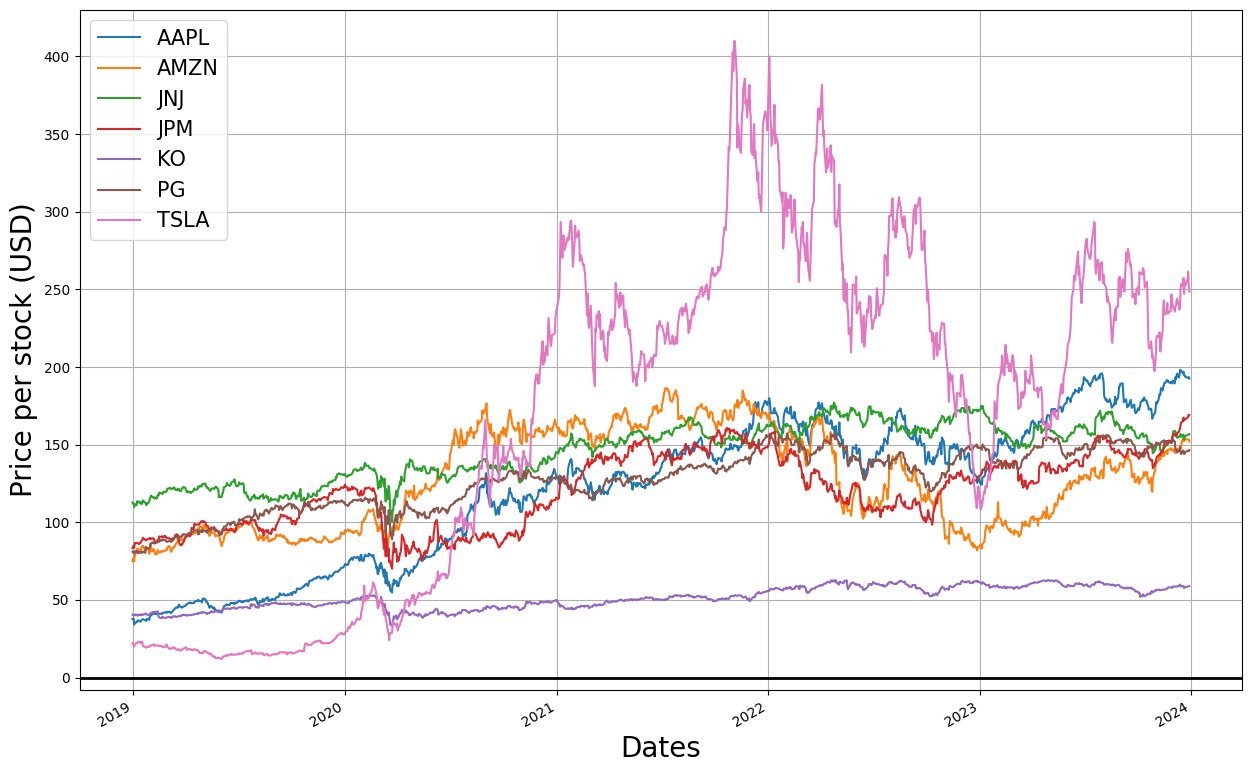

In [ ]:
# Creating Returns data-frame:
port_income_stocks_returns = (port_income_stocks_data.pct_change()[1:]).mean(axis = 1)
port_income_stocks_data.plot(grid = True, figsize = (15,10)).axhline(y = 0, color = "black", lw = 2)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Price per stock (USD)", fontsize=20)
plt.legend (fontsize=15)

 It is clear that the most volatile stock is TSLA, whereas the least risky stock is KO over the last 5 years. On the other hand, the remaining 5 stocks in the portfolio tend to overlap one another quite extensively. Therefore, it is hard to distinguish whether the stocks are correlated simply by visual inspection. To overcome this challenge, a correlation matrix is provided

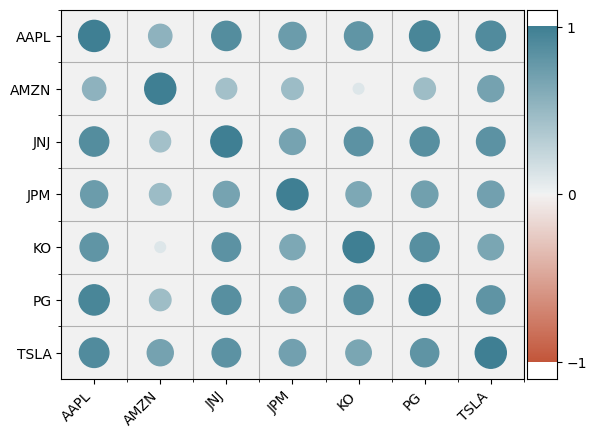

In [ ]:
corr = port_income_stocks_data.corr()
corrplot(corr, size_scale=500, marker='o')

 The correlation matrix indicates that the portfolio is not very diverse. The largest discrepancy is between KO and AMZN, but the rest of the stocks are highly, positively correlated with one another. An acknowledgement of this allows us to identify financial challenges associated with this portfolio. More specifically, it provides a strategic approach to diversify a portfolio by identifying correlation challenges, and provides an understanding of stock prices' volatility based on historical trends. With an awareness of these problems, well-informed investment decisions could be made. The daily returns of the overall portfolio is summarized as a distribution below.



In [ ]:
# Annualized Statistics:
port_C_avg = ((1+port_income_stocks_returns.mean())**252) - 1
port_C_std = port_income_stocks_returns.std()*np.sqrt(252)
port_C_skew = port_income_stocks_returns.skew()
port_C_kurtosis = port_income_stocks_returns.kurtosis()

port_C_stats = pd.DataFrame([port_C_avg, port_C_std, port_C_skew, port_C_kurtosis], index = ['Avg', 'Std', 'skew', 'kurtosis'], columns = ['Portfolio C'])
print(port_C_stats)

          Portfolio C
Avg          0.291655
Std          0.222160
skew        -0.445592
kurtosis     7.208043


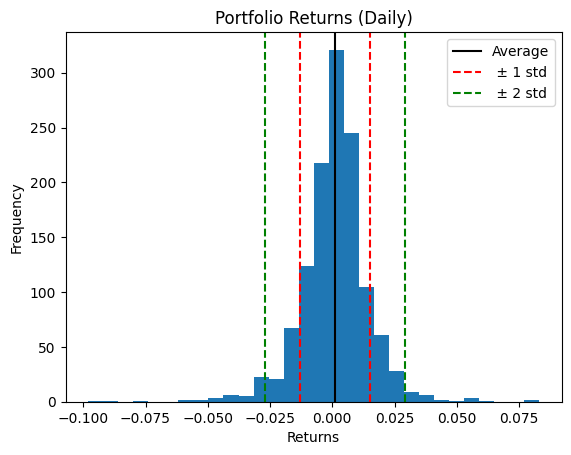

In [ ]:
# Daily Statistics:
port_C_avg = port_income_stocks_returns.mean()
port_C_std = port_income_stocks_returns.std()
port_C_skew = port_income_stocks_returns.skew()
port_C_kurtosis = port_income_stocks_returns.kurtosis()

port_income_stocks_returns.plot(kind = "hist", bins = 30)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Portfolio Returns (Daily)')
plt.axvline(port_C_avg, color = "black", label = "Average")
plt.axvline(port_C_avg + port_C_std, color = "red", ls = "--", label = " ± 1 std" )
plt.axvline(port_C_avg - port_C_std, color = "red", ls = "--")
plt.axvline(port_C_avg + 2*port_C_std, color = "green", ls = "--", label = " ± 2 std" )
plt.axvline(port_C_avg - 2*port_C_std, color = "green", ls = "--")
plt.legend()